## Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Load the dataset


In [2]:
data = pd.read_csv('shrink_ray_dataset.csv')
data.dropna(inplace=True)# Remove rows with missing data
print(data.head())# Display the first rows of the dataset


   Power  Shrinkage
0   0.00       0.00
1   1.51       0.00
2   3.02       0.00
3   4.52       2.67
4   6.03       0.00


In [3]:
# Create X features
X = data.drop("Shrinkage", axis=1)
# Create y
y = data["Shrinkage"]

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=80)
# Create a linear regression model
model = LinearRegression()

In [5]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

### Calculate the coefficienct 

In [1]:
# Get coefficients
m = model.coef_[0]
b = model.intercept_

# Predict the 85 position
given_x = 85
predicted_y = m * given_x + b

print("Predicted x:", predicted_x)


NameError: name 'model' is not defined

### Calculate accurecy on the test data

In [7]:
accurecy = model.score(X_test, y_test)
print("The accurecy of the model slection is :", accurecy)

The accurecy of the model slection is : 0.9889312352231874


### Compare the two scores with diferanet training technique


In [8]:
from sklearn.model_selection import  cross_val_score
# Calculate the single training and test split score
data_single_score = model.score(X_test, y_test)
# Take the mean of 5-fold cross-validation score
data_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))
# Compare the scores
print("Single Test Split Score:", data_single_score)
print("Mean 5-Fold Cross-Validation Score:", data_cross_val_score)

Single Test Split Score: 0.9889312352231874
Mean 5-Fold Cross-Validation Score: 0.7695889907031743


## Adjust the knob to shrink the moon with a percentage 85%  

In [9]:

desired_shrinkage = 85
knob = model.predict([[desired_shrinkage]])
print("Knob Position for 85% Shrinkage:", knob[0])

Knob Position for 85% Shrinkage: 24.417949672048127


c:\Diploma\Python\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Scatter plot of the data and linear model

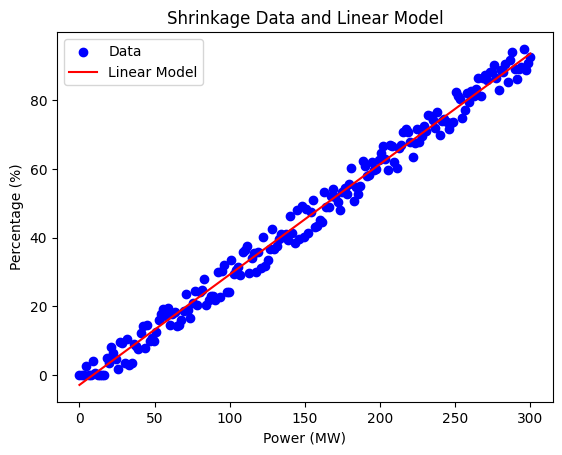

In [10]:
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', label='Linear Model')
plt.xlabel('Power (MW)')
plt.ylabel('Percentage (%)')
plt.title('Shrinkage Data and Linear Model')
plt.legend()
plt.show()